In [1]:
import xml.etree.ElementTree as ET
import os
import pandas as pd
import rasterio as rio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
abs_dir = os.getcwd()
data_dir = os.path.join(abs_dir, 'data')
path=os.path.join(data_dir, 'golfo_dulce_products.csv')
prod_info = pd.read_csv(path)  

In [3]:
prod_info['identifier'][0]

'S2A_MSIL1C_20200301T160511_N0209_R054_T17PKK_20200301T205613'

In [4]:
meta_data_path = os.path.join(data_dir, prod_info['identifier'][0]+'.SAFE', 'MTD_MSIL1C.xml')
print(meta_data_path)
tree = ET.parse(meta_data_path)
root = tree.getroot()

/home/angela/m3/tutorials/data-exploration/image-access/data/S2A_MSIL1C_20200301T160511_N0209_R054_T17PKK_20200301T205613.SAFE/MTD_MSIL1C.xml


In [5]:
for image_file in root.iter('IMAGE_FILE'):
    file = image_file.text
    print(file)

GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B01
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B02
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B03
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B04
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B05
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B06
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B07
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B08
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B8A
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B09
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B10
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B11
GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/

In [6]:
b4 = os.path.join(data_dir, prod_info['identifier'][0]+'.SAFE','GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B04.jp2')
b3 = os.path.join(data_dir, prod_info['identifier'][0]+'.SAFE','GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B03.jp2')
b2 = os.path.join(data_dir, prod_info['identifier'][0]+'.SAFE','GRANULE/L1C_T17PKK_A024504_20200301T160956/IMG_DATA/T17PKK_20200301T160511_B02.jp2')

In [8]:
with rio.open(b4) as src:
    red = src.read(1)
with rio.open(b3) as src:
    green  = src.read(1)
with rio.open(b2) as src:
    blue = src.read(1)

In [9]:
print(f"red:{red.shape}, green: {green.shape}, blue:{blue.shape}")

red:(10980, 10980), green: (10980, 10980), blue:(10980, 10980)


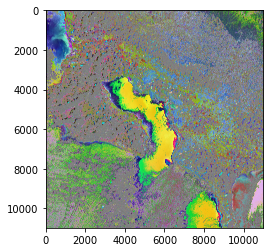

In [12]:
def scale(band):
    #return (band/22.5).astype(np.uint8)
    return band.astype(np.uint8)


small_rgb = np.dstack((scale(red), scale(green), scale(blue)))

plt.imshow(small_rgb)

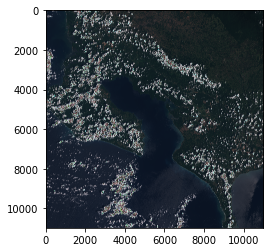

In [13]:
b_r = red/22.5
b_g = green/22.5
b_b = blue/22.5
rgb_scaled = np.zeros([len(b_r), len(b_r[0]), 3], np.uint8)
rgb_scaled[:, :, 0] = b_r
rgb_scaled[:, :, 1] = b_g
rgb_scaled[:, :, 2] = b_b

plt.imshow(rgb_scaled)

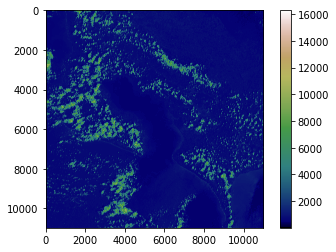

In [14]:
# Plot the green band using a non-default color ramp & a color bar
# see also: https://matplotlib.org/users/colormaps.html
fig = plt.imshow(green)
fig.set_cmap('gist_earth')
plt.colorbar()

# Display the results.
plt.show()

In [15]:
b4_band = rio.open(b4)
width = b4_band.width
height = b4_band.height
crs = b4_band.crs
transform = b4_band.transform
dtype = b4_band.dtypes[0]
print(f"width: {width}, height: {height}, crs:{crs}, dtype:{dtype}")
print(transform)
tiff_path = os.path.join(data_dir, 'RGB.tiff')
with rio.open(tiff_path,'w',driver='Gtiff', width=width, height=height, 
              count=3,crs=crs,transform=transform, dtype=dtype) as rgb:
    rgb.write(blue,3) 
    rgb.write(green,2) 
    rgb.write(red,1) 
    rgb.close()

width: 10980, height: 10980, crs:EPSG:32617, dtype:uint16
| 10.00, 0.00, 199980.00|
| 0.00,-10.00, 1000020.00|
| 0.00, 0.00, 1.00|


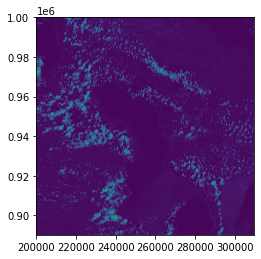

In [16]:
tiff_path = os.path.join(data_dir, 'RGB.tiff')
src = rio.open(tiff_path, transform=transform, count=3)
show(src)